## Логистическая регрессия

Возьмем и сами нагенирируем себе данные и обучим на них линейную модель.

данные есть 50 объектов состоящий из двух
признаковиз  зафиксировано случайность
и  два класса

In [1]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=50, n_features=2, random_state=12, centers=2)

display(X, y)

array([[ -5.2000508 ,   1.03101087],
       [ -6.26268518,   1.70399904],
       [ -6.09933951,  -0.51965652],
       [ -2.90487898,  -0.32621368],
       [ -7.51456607,   5.27345092],
       [ -7.91394699,   4.08713764],
       [ -4.93302704,   0.93256045],
       [ -6.27598204,   5.3283266 ],
       [ -3.73275694,   0.62337287],
       [ -6.88132681,   4.12304857],
       [ -5.30551643,   0.07148875],
       [ -8.59849966,   3.01289968],
       [ -7.2543384 ,   4.21572565],
       [ -3.2624657 ,   2.31125078],
       [ -3.79012431,   1.03243209],
       [ -6.41487085,   4.93984011],
       [ -6.16360032,   3.26627259],
       [ -7.94627336,   6.01079038],
       [ -3.86173157,  -0.77157158],
       [ -7.44514747,   4.76178476],
       [ -6.7017672 ,   4.41663513],
       [ -5.58091181,   5.11965922],
       [ -6.82539091,   0.82134757],
       [ -6.91161607,   4.68076626],
       [ -7.03166309,   7.04281172],
       [ -4.83896768,   1.18681003],
       [ -5.42257839,   1.47741832],
 

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1])

чтобы данные были введены масштабе поэтому берем стандартизацию

In [2]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X.mean(axis=0), X.std(axis=0)

(array([-7.77156117e-17, -2.22044605e-16]), array([1., 1.]))

In [3]:
X.T[0]

array([ 0.52224714, -0.15287646, -0.04909804,  1.98043886, -0.94823406,
       -1.20197278,  0.69189537, -0.16132436,  1.45446308, -0.5459181 ,
        0.45524165, -1.63688969, -0.78290359,  1.75325325,  1.41801586,
       -0.2495646 , -0.08992487, -1.22251069,  1.37252161, -0.90413034,
       -0.43183848,  0.28027467, -0.51038034, -0.56516179, -0.64143127,
        0.7516541 ,  0.38086866, -0.93175242,  0.07486238, -2.5680676 ,
       -0.03242025, -1.97792118,  0.47769133,  0.8506327 ,  0.56574906,
        0.76551623, -0.420711  ,  0.99159225,  0.12787473,  0.92005196,
        1.71290583,  0.28442022, -1.29791326,  0.07757474,  0.82865772,
        1.17181591, -0.72973207, -1.08111904, -1.30181897,  0.52539594])

In [4]:
X[:, 0]

array([ 0.52224714, -0.15287646, -0.04909804,  1.98043886, -0.94823406,
       -1.20197278,  0.69189537, -0.16132436,  1.45446308, -0.5459181 ,
        0.45524165, -1.63688969, -0.78290359,  1.75325325,  1.41801586,
       -0.2495646 , -0.08992487, -1.22251069,  1.37252161, -0.90413034,
       -0.43183848,  0.28027467, -0.51038034, -0.56516179, -0.64143127,
        0.7516541 ,  0.38086866, -0.93175242,  0.07486238, -2.5680676 ,
       -0.03242025, -1.97792118,  0.47769133,  0.8506327 ,  0.56574906,
        0.76551623, -0.420711  ,  0.99159225,  0.12787473,  0.92005196,
        1.71290583,  0.28442022, -1.29791326,  0.07757474,  0.82865772,
        1.17181591, -0.72973207, -1.08111904, -1.30181897,  0.52539594])

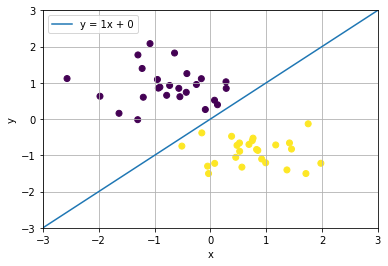

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-3, 4)
a = 1
b = 0

plt.scatter(X[:, 0], X.T[1], c=y)
plt.plot(x, a * x + b, label=f'y = {a}x + {b}')
plt.ylabel('y');plt.xlabel('x')
plt.ylim(-3, 3);plt.xlim(-3, 3)
plt.grid()
plt.legend();

# Одномерная логистическая регрессия

## LogisticRegression

### Обучение LogisticRegression из sklearn

In [6]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=25, n_features=1, n_informative=1,
                           n_redundant=0, random_state=11, n_clusters_per_class=1,
                           class_sep=0.4)

display(X, y)

array([[-0.86305361],
       [-1.4372011 ],
       [ 0.19592225],
       [-0.87164985],
       [ 0.00982831],
       [ 1.30282593],
       [ 0.16134434],
       [-0.9223264 ],
       [-0.10173176],
       [ 0.41006497],
       [ 0.27129997],
       [-0.71111212],
       [-2.98259876],
       [-0.09300387],
       [ 0.82285659],
       [ 0.16493473],
       [-0.40806382],
       [ 0.62136283],
       [ 0.76258897],
       [-0.11001122],
       [-1.26261842],
       [ 0.04513441],
       [ 0.50026937],
       [-0.6784482 ],
       [ 0.2182344 ]])

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1])

In [7]:
X.mean(axis=0), X.std(axis=0)

(array([-0.19820608]), array([0.87333629]))

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X.mean(axis=0), X.std(axis=0)

(array([1.77635684e-17]), array([1.]))

In [9]:
X.min()

-3.188225104184917

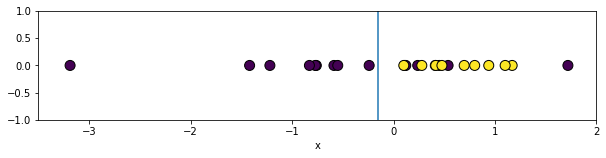

In [10]:
plt.figure(figsize=(10, 2))
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100, edgecolors='black') #Y будет везде равен нулю
plt.plot([-0.15, -0.15], [-1, 1]) #change just Y axis
plt.ylabel('');plt.xlabel('x')
#plt.yticks(np.arange(0, 1), [''])
plt.ylim(-1, 1);plt.xlim(-3.5, 2);

y = a* x + b<br>
**a - ? b - ?**

In [11]:
X.shape[0]

25

In [12]:
np.zeros(X.shape[0])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

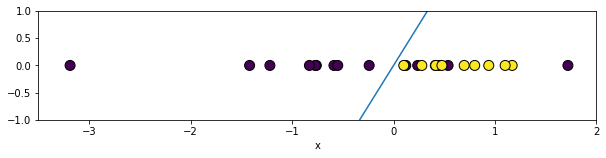

In [13]:
plt.figure(figsize=(10, 2))
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')

x = np.linspace(-3, 3)
plt.plot(x, 3*x + 0)
plt.ylabel('');plt.xlabel('x')
#plt.yticks(np.arange(0, 1), [''])
plt.ylim(-1, 1);plt.xlim(-3.5, 2);

Возьмем модель `LogisticRegression` из `sklearn` из модуля `linear_model`.

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model

LogisticRegression()

In [15]:
model.fit(X, y)

LogisticRegression()

In [16]:
model.coef_, model.intercept_

(array([[1.34494091]]), array([-0.19801197]))

In [17]:
model_a = model.coef_[0]
model_b = model.intercept_

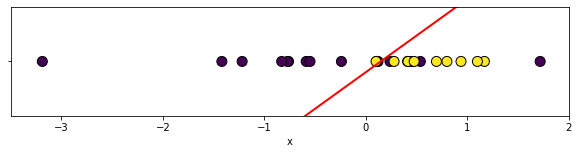

In [18]:
model_y_sk = model_a * x + model_b

plt.figure(figsize=(10, 2))
plt.plot(x, model_y_sk, linewidth=2, c='r')
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
plt.ylabel('');plt.xlabel('x')
plt.yticks(np.arange(0, 1), [''])
plt.ylim(-1, 1);plt.xlim(-3.5, 2);

In [19]:
model.score(X, y) #получаем долю правильных ответов 0.8 

0.8

Чтобы теперь сделать предсказания этой моделью достаточно вызвать метод `predict` и передать в него данные.

In [20]:
y_pred_cl = model.predict(X)
y_pred_cl[:5]

array([0, 0, 1, 0, 1])

Или же можем можем сделать точно такое же предсказание, если возьмем коэффициент наклона и умножим на значение признака и прибавим к этому коэффициент сдвига. 

In [21]:
y_pred = model_a * X + model_b
y_pred[:5]

array([[-1.22187946],
       [-2.1060686 ],
       [ 0.40894703],
       [-1.23511771],
       [ 0.12236172]])

 предсказание линейной регрессии это не классы 

In [22]:
y_pred_cl = model.predict(X)
y_pred_cl[:5]

array([0, 0, 1, 0, 1])

там где нулевые классы у нас значение линейной регрессии отрицательные а там
где положительные классы у нас значение скалярного произведения положительные То есть как будто если у нас скалярное произведение отрицательное это будет
нулевой класс и как будто если скалярное произведение положительное это будет
первый класс


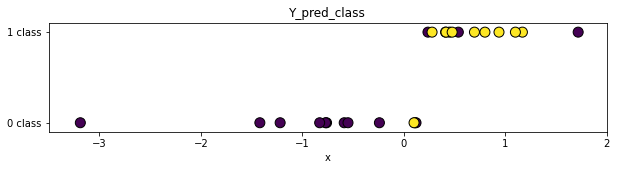

In [23]:
plt.figure(figsize=(10, 2))
plt.scatter(X, y_pred_cl, c=y, s=100, edgecolors='black')
plt.ylabel('');plt.xlabel('x')
plt.yticks(np.arange(0, 2), ['0 class', '1 class'])
plt.ylim(-0.1, 1.1);plt.xlim(-3.5, 2)
plt.title('Y_pred_class');

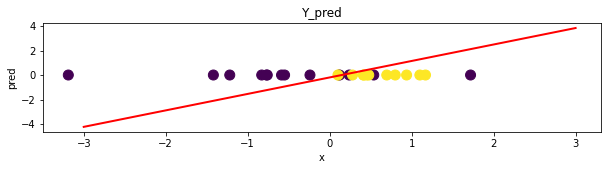

In [24]:
model_y_sk = model_a * x + model_b

plt.figure(figsize=(10, 2))
plt.plot(x, model_y_sk, linewidth=2, c='r')
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100)
plt.ylabel('pred');plt.xlabel('x')
plt.title('Y_pred');

In [25]:
pred_proba = model.predict_proba(X) #predictions of probability 
pred_proba[:5] # first column indicates probability of 1 class
#sum of raws equal to one !

array([[0.77239413, 0.22760587],
       [0.89149162, 0.10850838],
       [0.39916463, 0.60083537],
       [0.77471304, 0.22528696],
       [0.46944768, 0.53055232]])

In [26]:
pred_proba.T[1]

array([0.22760587, 0.10850838, 0.60083537, 0.22528696, 0.53055232,
       0.89221634, 0.58799838, 0.21195858, 0.48764223, 0.67671755,
       0.62832296, 0.27132923, 0.01114027, 0.49100092, 0.79809464,
       0.58933722, 0.37257317, 0.74347843, 0.78272469, 0.48445712,
       0.13738152, 0.54406866, 0.70633348, 0.28138812, 0.60904694])

In [27]:
pred_proba = pred_proba[:, 1]
pred_proba[:5]

array([0.22760587, 0.10850838, 0.60083537, 0.22528696, 0.53055232])

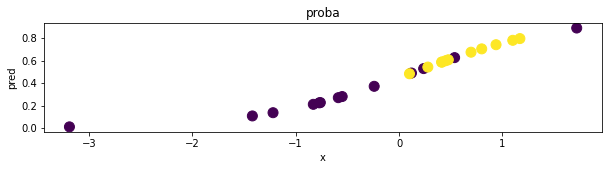

In [28]:
plt.figure(figsize=(10, 2))
plt.scatter(X, pred_proba, c=y, s=100)
plt.ylabel('pred');plt.xlabel('x')
plt.title('proba');

In [29]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

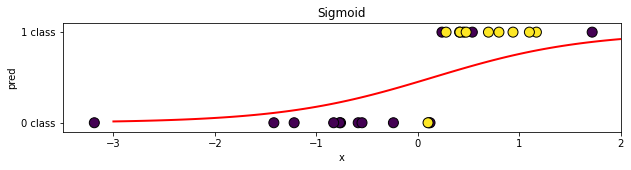

In [30]:
x = np.linspace(-3, 3, num=100)
model_y_sk = model_a * x + model_b

plt.figure(figsize=(10, 2))
plt.plot(x, sigmoid(model_y_sk), linewidth=2, c='r')
plt.scatter(X, y_pred_cl, c=y, s=100, edgecolors='black')
plt.ylabel('pred');plt.xlabel('x')
plt.yticks(np.arange(0, 2), ['0 class', '1 class'])
plt.ylim(-0.1, 1.1);plt.xlim(-3.5, 2)
plt.title('Sigmoid');

видели выше только не видит точек а виде кривой И на самом деле с помощью
этой сигмоиды модель линейной регрессии становится логистической регрессией
которая уже Создана для сдачи классификации

**Logistic Regression = Linear Regression + Sigmoid**

### Сравнение моделей 

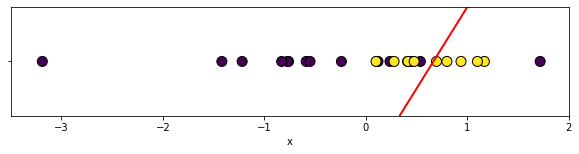

In [31]:
a = 3
b = -2
model_y = a * x + b


plt.figure(figsize=(10, 2))
plt.plot(x, model_y, linewidth=2, c='r')
plt.scatter(X, np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
plt.ylabel('');plt.xlabel('x')
plt.yticks(np.arange(0, 1), [''])
plt.ylim(-1, 1);plt.xlim(-3.5, 2);

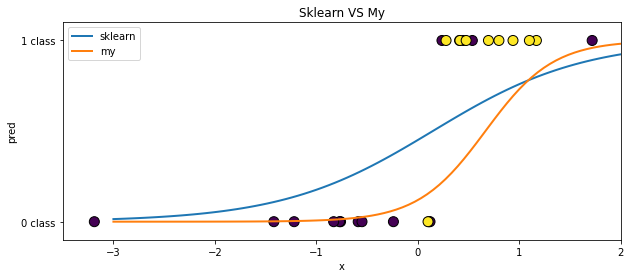

In [32]:
plt.figure(figsize=(10, 4))
plt.plot(x, sigmoid(model_y_sk), linewidth=2, label='sklearn')
plt.plot(x, sigmoid(model_y), linewidth=2, label='my')
plt.scatter(X, y_pred_cl, c=y, s=100, edgecolors='black')
plt.ylabel('pred');plt.xlabel('x')
plt.yticks(np.arange(0, 2), ['0 class', '1 class'])
plt.ylim(-0.1, 1.1);plt.xlim(-3.5, 2)
plt.title('Sklearn VS My')
plt.legend();

Составим все данные в одну таблицу:
- `X` - это точки, на которых строим модель
- `y` - это настоящая целевая переменная, которую хотим предсказать
- `pred_model_good` - это значения на линии по координатам `X` первой модели, имеем предсказания модель `LinearRegression`
- и `pred_bad_model` - это значения на линии по координатам `X` второй модели, которая создана вручную, а не силами `sklearn`

In [33]:
np.squeeze(X)

array([-0.76127322, -1.41869179,  0.45129046, -0.77111621,  0.23820651,
        1.71873313,  0.41169756, -0.82914259,  0.11046641,  0.69649121,
        0.53760054, -0.587295  , -3.1882251 ,  0.12046015,  1.16915177,
        0.41580869, -0.2402943 ,  0.93843451,  1.10014328,  0.10098614,
       -1.21878863,  0.27863321,  0.79977834, -0.54989369,  0.47683863])

In [34]:
import pandas as pd

df = pd.DataFrame({
    'X': np.squeeze(X),
    'y': y,
    'pred_sk_model': sigmoid(np.squeeze(model_a * X + model_b)),
    'pred_my_model': sigmoid(np.squeeze(a * X + b))
})


df.head()

,X,y,pred_sk_model,pred_my_model
0,-0.761273,0,0.227606,0.013602
1,-1.418692,0,0.108508,0.001915
2,0.451290,1,0.600835,0.343862
3,-0.771116,0,0.225287,0.013212
4,0.238207,0,0.530552,0.216636


In [35]:
df['sk_class'] = (df['pred_sk_model'] > 0.5).astype('int')
df['my_class'] = (df['pred_my_model'] > 0.5).astype('int')
df.head()

,X,y,pred_sk_model,pred_my_model,sk_class,my_class
0,-0.761273,0,0.227606,0.013602,0,0
1,-1.418692,0,0.108508,0.001915,0,0
2,0.451290,1,0.600835,0.343862,1,0
3,-0.771116,0,0.225287,0.013212,0,0
4,0.238207,0,0.530552,0.216636,1,0


Посчитаем отклонения предсказаний от истины для каждой модели.

In [36]:
df.shape[0]

25

In [37]:
df[df['sk_class'] != df['y']]

,X,y,pred_sk_model,pred_my_model,sk_class,my_class
4,0.238207,0,0.530552,0.216636,1,0
5,1.718733,0,0.892216,0.959152,1,1
8,0.110466,1,0.487642,0.158611,0,0
10,0.537601,0,0.628323,0.404392,1,0
19,0.100986,1,0.484457,0.154852,0,0


In [38]:
(df['sk_class'] == df['y']).sum()

20

In [39]:
(df['my_class'] == df['y']).sum()

17

### Правдоподобие


https://www.kaggle.com/code/dansbecker/what-is-log-loss

Правдоподобие (Likelihood) показывает насколько вероятным, по мнению модели, был наблюдаемый набор результатов.

<img src='https://miro.medium.com/max/1200/1*jxZFpWtCbD4jHPV0DdDuMA.gif'>

In [40]:
df.head(3)

,X,y,pred_sk_model,pred_my_model,sk_class,my_class
0,-0.761273,0,0.227606,0.013602,0,0
1,-1.418692,0,0.108508,0.001915,0,0
2,0.451290,1,0.600835,0.343862,1,0


Предсказания модели [0.22, 0.10, 0.60]. Первые два имеют 0 класс, а третий 1 класс.

Для 3-го объекта модель говорит, что с вероятностью 60% он относится к 1 классу. Значит правдоподобие для одной точки 0.60.




Для 2 объекта модель говорит, что с вероятностью $10%$ он относится к 1 классу, получается с вероятностью $90%$ он относится к 0 классу, правдоподобие для этой точки $0.90$ и мы его перемножаем с $0.60$.

Тоже самое с 1 объектом, вероятность быть 1 классом - $22%$, значит $78%$, что точка принадлежит 0 классу, перемножаем это на $0.78 \cdot 0.60 \cdot 0.90$


In [41]:
0.78 * 0.60 * 0.90

0.42119999999999996

Теперь сделаем для всех точек

In [42]:
df[df['y'] == 1]['pred_sk_model']

2     0.600835
6     0.587998
8     0.487642
9     0.676718
14    0.798095
15    0.589337
17    0.743478
18    0.782725
19    0.484457
21    0.544069
22    0.706333
24    0.609047
Name: pred_sk_model, dtype: float64

In [43]:
likelihood_1 = np.prod(df[df['y'] == 1]['pred_sk_model'])
likelihood_1

0.003618308869915949

In [44]:
likelihood_0 = np.prod(1 - df[df['y'] == 0]['pred_sk_model'])
likelihood_0

0.001127745959945556

In [45]:
likelihood = likelihood_1 * likelihood_0
likelihood

4.080533209882882e-06

In [46]:
likelihood / df.shape[0]

1.6322132839531528e-07

In [47]:
- np.log(likelihood) / df.shape[0]

0.49637131557561776

In [48]:
from sklearn.metrics import log_loss

log_loss(y, df['pred_sk_model'])

0.49637131557561776

In [49]:
-np.log(np.prod(df[df['y'] == 1]['pred_my_model']) * np.prod(1 - df[df['y'] == 0]['pred_my_model']))  / df.shape[0]

0.6310887863810843

In [50]:
log_loss(y, df['pred_my_model'])

0.6310887863810843

делаем Вывод что наша найденная Линейная модель
не самая лучшая она проигрывает "pred_sk_model" версия

### Logloss (cross entropy)

$$\prod p_i^{y_i} (1-p_i)^{1-y_i} → max$$


$ \log_a{bc} = \log_a{b} + \log_a{c}$

$$log loss = \sum (log(p_i)^{y_i} + log(1 - p_i)^{1-y_i})$$



$ \log_a{b^c}= c \cdot \log_a{b}$

$$log loss = - \frac{1}{n}\sum (y_i \cdot log(p_i) + (1-y_i) \cdot log(1 - p_i)) → min $$

In [51]:
- (np.sum(np.log(df[df['y'] == 1]['pred_sk_model'])) + np.sum(np.log(1 - df[df['y'] == 0]['pred_sk_model']))) / df.shape[0]

0.49637131557561776

In [52]:
- (np.sum(np.log(df[df['y'] == 1]['pred_my_model'])) + np.sum(np.log(1 - df[df['y'] == 0]['pred_my_model']))) / df.shape[0]

0.6310887863810843

функции потерь и обучается модель логистической
регрессии собственно и название логистической регрессия происходит от
логистической функции потерь

## Как обучается логистическая регрессия

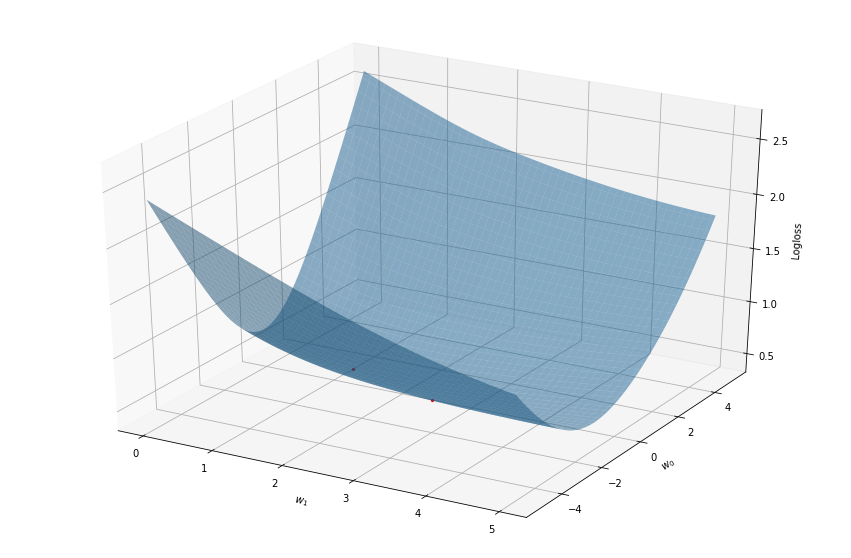

In [53]:
from mpl_toolkits.mplot3d.axes3d import Axes3D


def logloss(w1, w0):
    y_pred = sigmoid(w1 * X + w0)
    return log_loss(y, y_pred)


coefs_a = np.linspace(0, 5, num=100)
coefs_b = np.linspace(-5, 5, num=100)
w1, w0 = np.meshgrid(coefs_a, coefs_b)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

zs = np.array([logloss(i, j) for i, j in zip(np.ravel(w1), np.ravel(w0))])
Z = zs.reshape(w1.shape)

ax.plot_surface(w1, w0, Z, alpha=.5)
ax.scatter(model_a, model_b, logloss(model_a, model_b), c='r', s=5)
ax.scatter(a, b, logloss(a, b), c='r', s=5)

ax.set_xlabel(r'$w_1$')
ax.set_ylabel(r'$w_0$')
ax.set_zlabel('Logloss')

plt.show()

мы можем считать градиенты в любой точке этого
логоса и скатываться по направлению антиградиента пока не окажемся самыми
минимальной точке

In [54]:
X

array([[-0.76127322],
       [-1.41869179],
       [ 0.45129046],
       [-0.77111621],
       [ 0.23820651],
       [ 1.71873313],
       [ 0.41169756],
       [-0.82914259],
       [ 0.11046641],
       [ 0.69649121],
       [ 0.53760054],
       [-0.587295  ],
       [-3.1882251 ],
       [ 0.12046015],
       [ 1.16915177],
       [ 0.41580869],
       [-0.2402943 ],
       [ 0.93843451],
       [ 1.10014328],
       [ 0.10098614],
       [-1.21878863],
       [ 0.27863321],
       [ 0.79977834],
       [-0.54989369],
       [ 0.47683863]])

создадим константный признак который везде равен единице это
у нас будет массив единичек который мы сконцентрируем вместе с исходной таблицей . константные эффективные
значащие являются вспомогательным признаком для нашего свободного веса 

In [55]:
X = np.c_[np.ones_like(X), X]
X

array([[ 1.        , -0.76127322],
       [ 1.        , -1.41869179],
       [ 1.        ,  0.45129046],
       [ 1.        , -0.77111621],
       [ 1.        ,  0.23820651],
       [ 1.        ,  1.71873313],
       [ 1.        ,  0.41169756],
       [ 1.        , -0.82914259],
       [ 1.        ,  0.11046641],
       [ 1.        ,  0.69649121],
       [ 1.        ,  0.53760054],
       [ 1.        , -0.587295  ],
       [ 1.        , -3.1882251 ],
       [ 1.        ,  0.12046015],
       [ 1.        ,  1.16915177],
       [ 1.        ,  0.41580869],
       [ 1.        , -0.2402943 ],
       [ 1.        ,  0.93843451],
       [ 1.        ,  1.10014328],
       [ 1.        ,  0.10098614],
       [ 1.        , -1.21878863],
       [ 1.        ,  0.27863321],
       [ 1.        ,  0.79977834],
       [ 1.        , -0.54989369],
       [ 1.        ,  0.47683863]])

Реализуем функцию:
1. logloss - функция логистической функции потерь (cross entropy) $logloss = - \frac{1}{n}\sum (y_i \cdot log(p_i) + (1-y_i) \cdot log(1 - p_i))$


2. gr_logloss - градиент функции logloss записанные в матричном виде. $X^{T}(\sigma(XW)-Y)$


In [56]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def logloss(y, y_proba):
    logloss_1 = np.sum(np.log(y_proba[y == 1] + 1e-30)) #чтобы не оказалось совсем 0 добявлаем 1e-30
    logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + 1e-30))
    logloss_total = -(logloss_0 + logloss_1) / len(y)
    return logloss_total


def gr_logloss(X, W, y):
    y_proba = sigmoid(X @ W)
    grad = X.T @ (y_proba - y)
    return grad

In [57]:
test_y     = [1, 0]
test_proba = [0, 1]
logloss(test_y, test_proba), log_loss(test_y, test_proba)

(34.538776394910684, 34.53917619362578)

Итерация: 0
Logloss 0.7809352018720266
Accuracy 0.16
--------------------------------------------------------
Итерация: 80
Logloss 0.5979220700310761
Accuracy 0.84
--------------------------------------------------------
Итерация: 160
Logloss 0.5122672986031042
Accuracy 0.84
--------------------------------------------------------
Итерация: 240
Logloss 0.48223175784563155
Accuracy 0.84
--------------------------------------------------------


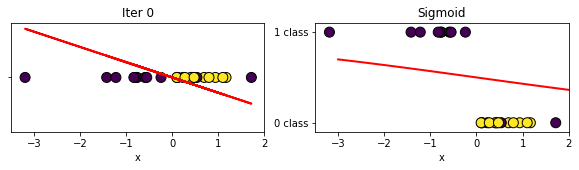

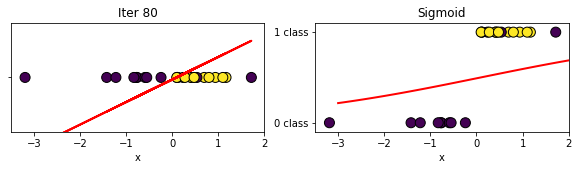

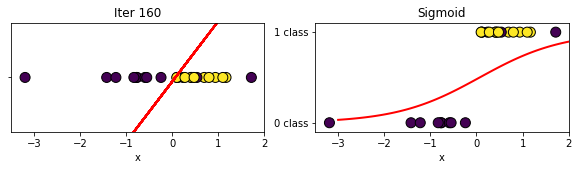

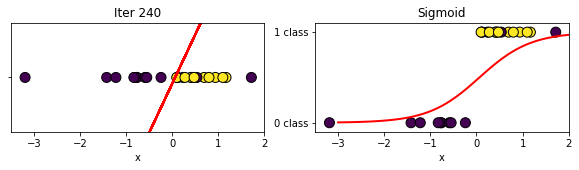

In [58]:
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# первоначальное точка
np.random.seed(9)
W = np.random.randn(X.shape[1])

# размер шага (learning rate)
learning_rate = 0.001

next_W = W

# количество итерация 
n = 250
for i in range(n):
    cur_W = next_W

    # движение в негативную сторону вычисляемого градиента
    next_W = cur_W - learning_rate * gr_logloss(X, W, y)

    # остановка когда достигнута необходимая степень точности
    if np.linalg.norm(cur_W - next_W) <= eps:
        break

    if i % 80 == 0:
        print(f"Итерация: {i}")
        # print(f"Текущая точка {cur_W}| Следующая точка {next_W}")
        y_proba = sigmoid(X @ next_W)
        y_class = np.where(y_proba >= 0.5, 1, 0)
        accuracy = (y_class == y).sum() / len(y)
        print(f"Logloss {logloss(y, y_proba)}")
        print(f"Accuracy {accuracy}")
        print("--------------------------------------------------------")  

        model_grad = next_W @ X.T
        plt.figure(figsize=(10, 2))

        plt.subplot(121)
        plt.plot(X[:, 1], model_grad, linewidth=2, c='r', label='gradient')
        plt.scatter(X[:, 1], np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
        plt.ylabel('');plt.xlabel('x')
        plt.yticks(np.arange(0, 1), [''])
        plt.title(f'Iter {i}')
        plt.ylim(-1, 1);plt.xlim(-3.5, 2);  


        plt.subplot(122)
        x_ones = np.c_[np.ones_like(x), x]
        model_pred_x = next_W @ x_ones.T

        plt.plot(x, sigmoid(model_pred_x), linewidth=2, c='r')
        plt.scatter(X[:, 1], sigmoid(model_grad) >= 0.5, c=y, s=100, edgecolors='black')
        plt.ylabel('');plt.xlabel('x')
        plt.yticks(np.arange(0, 2), ['0 class', '1 class'])
        plt.ylim(-0.1, 1.1);plt.xlim(-3.5, 2)
        plt.title('Sigmoid');

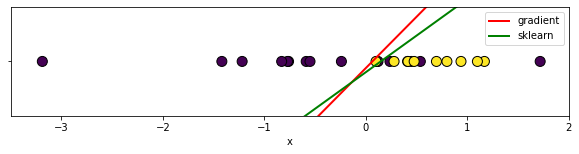

In [59]:
model_grad = next_W[1] * x + next_W[0]


plt.figure(figsize=(10, 2))
plt.plot(x, model_grad, linewidth=2, c='r', label='gradient')
plt.plot(x, model_y_sk, linewidth=2, c='g', label='sklearn')
plt.scatter(X[:, 1], np.zeros(X.shape[0]), c=y, s=100, edgecolors='black')
plt.ylabel('');plt.xlabel('x')
plt.yticks(np.arange(0, 1), [''])
plt.legend()
plt.ylim(-1, 1);plt.xlim(-3.5, 2);

In [60]:
y_proba = sigmoid(X @ next_W)
y_proba

array([0.17397633, 0.05746958, 0.67451307, 0.17132527, 0.58100106,
       0.95765024, 0.65791435, 0.15634526, 0.52149209, 0.76692197,
       0.70918156, 0.22624161, 0.00216344, 0.52619232, 0.88916558,
       0.65965685, 0.36000043, 0.83851398, 0.87567825, 0.51702983,
       0.08163167, 0.59943501, 0.79991558, 0.23882479, 0.68499901])

In [61]:
np.where(y_proba > 0.5, 1, 0)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1])

# Многомерная логистическая регрессия




In [62]:
X, y = make_classification(n_samples=50, n_features=2, 
                           n_informative=2, n_redundant=0,
                           random_state=11)

display(X, y)

array([[-0.58426249, -0.26304715],
       [-0.87385157,  0.03334535],
       [-0.83376357,  0.56089118],
       [-0.36054172,  1.23330648],
       [-0.96996002, -0.51336961],
       [ 0.87096085, -1.33644586],
       [ 0.88714034, -0.49693129],
       [-0.97267638,  1.8062936 ],
       [-1.56089158,  0.81454957],
       [ 1.05054058, -1.36505594],
       [ 0.9851866 , -0.87000251],
       [ 1.55985218,  2.83593357],
       [ 0.93879173, -0.6224016 ],
       [ 0.33585538,  0.73504779],
       [-0.93897517,  1.18220327],
       [-0.88659662, -0.73309719],
       [-0.89879515, -1.59444315],
       [ 1.09571977,  2.02411724],
       [-1.59503021, -0.40847071],
       [-1.17747512,  0.84767099],
       [-1.21644763, -1.06794308],
       [-1.04836107, -0.67305344],
       [-0.94654293, -0.87003831],
       [-0.79154717, -0.19781098],
       [ 0.94786239,  2.68547589],
       [ 1.25268747,  0.85946774],
       [-1.21287477, -1.06611934],
       [ 1.0820104 , -0.72574433],
       [ 3.08649247,

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0])

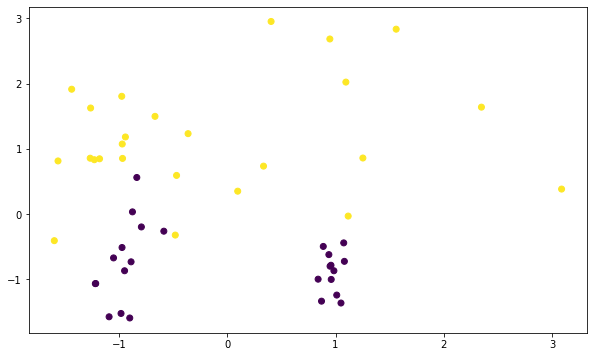

In [63]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y);

### Из sklearn

Обучим для начала модель из `sklearn`

In [64]:
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [65]:
model.coef_, model.intercept_

(array([[0.02774742, 2.37815401]]), array([-0.10805746]))

In [66]:
model.predict(X[:1])

array([0])

In [67]:
np.sum(model.coef_ * X[0]) + model.intercept_

array([-0.74983587])

In [68]:
df = pd.DataFrame(X)
df['y'] = y
df['pred_cl'] = model.predict(X)
df['pred_proba'] = sigmoid(X.dot(model.coef_.T) + model.intercept_)

df.head()

,0,1,y,pred_cl,pred_proba
0,-0.584262,-0.263047,0,0,0.320857
1,-0.873852,0.033345,0,0,0.486752
2,-0.833764,0.560891,0,1,0.769004
3,-0.360542,1.233306,1,1,0.943477
4,-0.969960,-0.513370,0,0,0.204917


In [69]:
(df['y'] == df['pred_cl']).mean()

0.92

In [70]:
model.score(X, y)

0.92

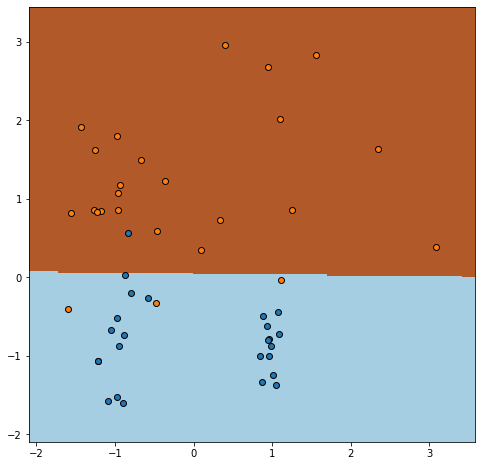

In [71]:
x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5

h = .02
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

x_t = np.c_[xx.ravel(),yy.ravel()]

Z = model.predict(x_t)
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8,8))
plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], edgecolors='k')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], edgecolors='k')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.show()

### Своя реализация линейной регрессии

In [72]:
X = np.c_[np.ones(len(X)), X]
X

array([[ 1.        , -0.58426249, -0.26304715],
       [ 1.        , -0.87385157,  0.03334535],
       [ 1.        , -0.83376357,  0.56089118],
       [ 1.        , -0.36054172,  1.23330648],
       [ 1.        , -0.96996002, -0.51336961],
       [ 1.        ,  0.87096085, -1.33644586],
       [ 1.        ,  0.88714034, -0.49693129],
       [ 1.        , -0.97267638,  1.8062936 ],
       [ 1.        , -1.56089158,  0.81454957],
       [ 1.        ,  1.05054058, -1.36505594],
       [ 1.        ,  0.9851866 , -0.87000251],
       [ 1.        ,  1.55985218,  2.83593357],
       [ 1.        ,  0.93879173, -0.6224016 ],
       [ 1.        ,  0.33585538,  0.73504779],
       [ 1.        , -0.93897517,  1.18220327],
       [ 1.        , -0.88659662, -0.73309719],
       [ 1.        , -0.89879515, -1.59444315],
       [ 1.        ,  1.09571977,  2.02411724],
       [ 1.        , -1.59503021, -0.40847071],
       [ 1.        , -1.17747512,  0.84767099],
       [ 1.        , -1.21644763, -1.067

In [73]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def logloss(y, y_proba):
    logloss_1 = np.sum(np.log(y_proba[y == 1] + 1e-30))
    logloss_0 = np.sum(np.log(1 - y_proba[y == 0] + 1e-30))
    logloss_total = -(logloss_0 + logloss_1) / len(y)
    return logloss_total


def gr_logloss(X, W, y):
    y_proba = sigmoid(X @ W)
    grad = X.T @ (y_proba - y)
    return grad

In [74]:
def visualize(W):
    x_t_ones = np.c_[np.ones(x_t.shape[0]), x_t]

    y_proba = sigmoid(x_t_ones @ W)
    Z = np.where(y_proba >= 0.5, 1, 0)

    Z = Z.reshape(xx.shape)

    plt.figure(1, figsize=(8,8))
    plt.pcolormesh(xx,yy,Z,cmap=plt.cm.Paired)

    plt.scatter(X[y == 0][:, 1], X[y == 0][:, 2], edgecolors='k')
    plt.scatter(X[y == 1][:, 1], X[y == 1][:, 2], edgecolors='k')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks()
    plt.show()

Итерация: 0
Logloss 2.259021790386789
Accuracy 0.14
--------------------------------------------------------


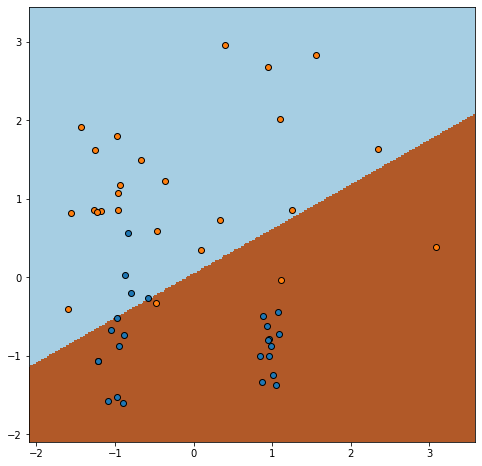

Итерация: 70
Logloss 0.3558220178313083
Accuracy 0.92
--------------------------------------------------------


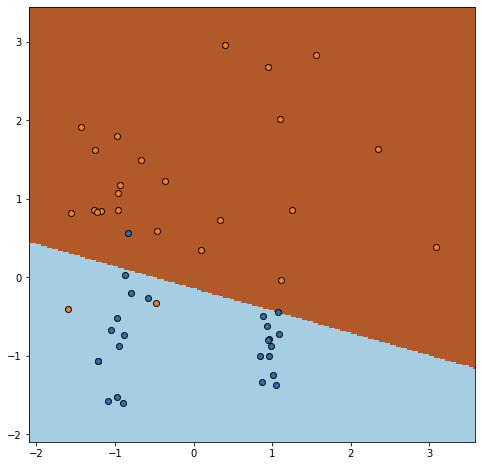

Итерация: 140
Logloss 0.20385651072325695
Accuracy 0.9
--------------------------------------------------------


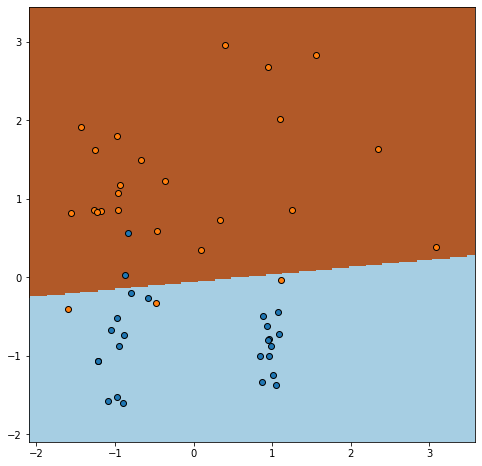

Итерация: 210
Logloss 0.27279613823859705
Accuracy 0.88
--------------------------------------------------------


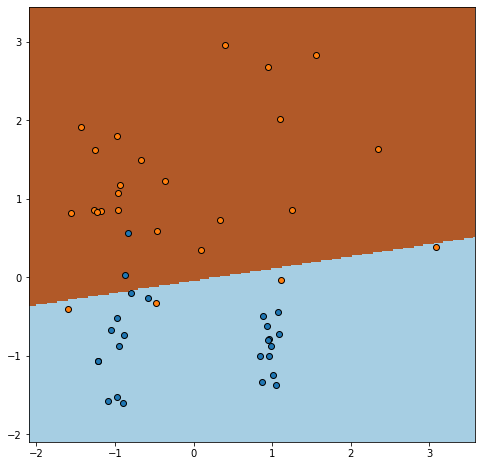

In [75]:
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# первоначальное точка
np.random.seed(8)
W = np.random.randn(X.shape[1])

# размер шага (learning rate)
learning_rate = 0.001

next_W = W

# количество итерация 
n = 250
for i in range(n):
    cur_W = next_W

    # движение в негативную сторону вычисляемого градиента
    next_W = cur_W - learning_rate * gr_logloss(X, W, y)

    # остановка когда достигнута необходимая степень точности
    if np.linalg.norm(cur_W - next_W) <= eps:
        break

    if i % 70 == 0:
        print(f"Итерация: {i}")
        # print(f"Текущая точка {cur_W}| Следующая точка {next_W}")
        y_proba = sigmoid(X @ next_W)
        y_class = np.where(y_proba >= 0.5, 1, 0)
        accuracy = (y_class == y).sum() / len(y)
        print(f"Logloss {logloss(y, y_proba)}")
        print(f"Accuracy {accuracy}")
        print("--------------------------------------------------------") 

        visualize(next_W)   

In [76]:
next_W

array([ 0.38352166, -1.55677194,  9.11878295])

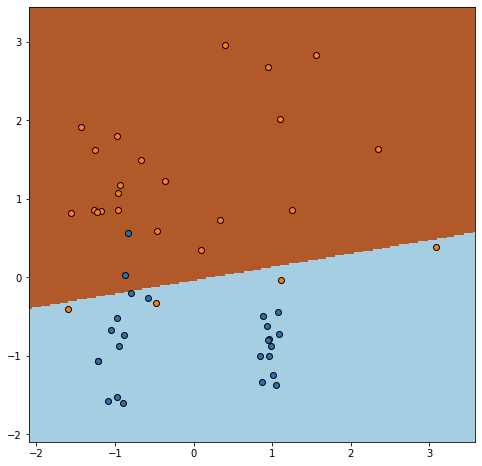

In [77]:
visualize(next_W)

,0,1
0,1.162435,-0.061176
1,0.945128,-0.043227
2,1.078331,-0.102277
3,1.156040,0.115038
4,0.999199,0.228718


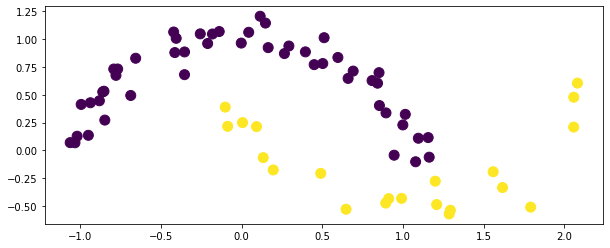

In [81]:
from sklearn.datasets import make_moons

n_samples=100

X, y = make_moons(n_samples=n_samples, shuffle=False, noise=0.1, random_state=1)

# прореживаем, чтобы был дисбаланс
i = (y==0) | (np.random.rand(n_samples) > 0.5)
X = X[i, :]
y = y[i]

plt.figure(figsize=(10, 4))
plt.scatter(X[:,0], X[:,1], 100, y)
pd.DataFrame(X[:5,:])

In [83]:
X.shape

(71, 2)

In [101]:

import numpy as np
from sklearn.metrics import accuracy_score

class SLR(object):
    """
    This is the SLR class
    """

    def __init__(self, learning_rate=10e-3, n_epochs=10_000, cutoff=0.5):
        """
        The __init__ method
        Params:
            learning_rate
            n_epochs
            cutoff
        """
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.cutoff = cutoff

        self.w = None
        self.b = 0.0

    def __repr__(self):
        params = {
            'learning_rate': self.learning_rate,
            'n_epochs': self.n_epochs,
            'cutoff': self.cutoff
        }
        return "SLR({0}={3}, {1}={4}, {2}={5})".format(*params.keys(), *params.values())

    def sigmoid(self, z):
        """
        The sigmoid method:
        Param:
            z
        Return:
            1.0 / (1.0 + exp(-z))
        """
        return 1.0 / (1.0 + np.exp(-z))

    def predict_proba(self, row):
        """
        The predict_proba
        Param:
            row
        Return:
            sigmoid(z)
        """
        z = np.dot(row, self.w) + self.b
        return self.sigmoid(z)

    def predict(self, X):
        if not isinstance(X, np.ndarray):
            X = X.to_numpy()

        self.predict_probas = []
        for i in range(X.shape[0]):
            ypred = self.predict_proba(X[i])
            self.predict_probas.append(ypred)

        return (np.array(self.predict_probas) >= self.cutoff) * 1.0

    def score(self, X, y):
        """
        The score method
        Param
            X, y
        Return
            accuracy_score(y, ypred)
        """
        ypred = self.predict(X)
        #y = y.to_numpy()
        return accuracy_score(y, ypred)

    def fit(self, X, y):
        """
        The fit method implement stochastic gradient descent
        Param
            X, y
        Return
            None
        """
        if not isinstance(X, np.ndarray):
            X = X.to_numpy()

        if not isinstance(y, np.ndarray):
            y = y.to_numpy()

        self.w = np.zeros(X.shape[1])
        self.cost = []

        self.m = X.shape[0]
        self.log_loss = {}
        self.cost = []

        for n_epoch in range(1, self.n_epochs + 1):
            losses = []
            for i in range(self.m):
                yhat = self.predict_proba(X[i])
                grad_b = yhat - y[i]
                grad_w =  X[i] * (yhat - y[i])

                self.w -= self.learning_rate * grad_w / self.m
                self.b -= self.learning_rate * grad_b / self.m
                loss = -1/self.m * (y[i] * np.log(yhat) + (1 - y[i]) * np.log(1 - yhat))
                losses.append(loss)

            self.cost.append(sum(losses))

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [103]:

from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
     

(56, 2)
(15, 2)
(56,)
(15,)


In [104]:
pipe0 = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', SLR(learning_rate=1e-2, n_epochs=1000, cutoff=0.5))
])

In [105]:
pipe0.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lr', SLR(learning_rate=0.01, n_epochs=1000, cutoff=0.5))])

In [106]:
accuracies = {
    'train accuracy': pipe0.score(X_train, y_train),
    'test accuracy': pipe0.score(X_test, y_test)
}

In [107]:
print(*accuracies.items())

('train accuracy', 0.875) ('test accuracy', 0.7333333333333333)


In [108]:
print(classification_report(y_test, pipe0.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.40      0.67      0.50         3

    accuracy                           0.73        15
   macro avg       0.65      0.71      0.66        15
weighted avg       0.80      0.73      0.75        15



In [109]:
print(classification_report(y_train, pipe0.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91        38
           1       0.79      0.83      0.81        18

    accuracy                           0.88        56
   macro avg       0.85      0.86      0.86        56
weighted avg       0.88      0.88      0.88        56



In [110]:
import matplotlib
matplotlib.rcParams['font.family'] = 'monospace'

In [111]:
predictions = pipe0.predict(X_test)
predict_probas = pipe0['lr'].predict_probas
cutoff = pipe0['lr'].cutoff

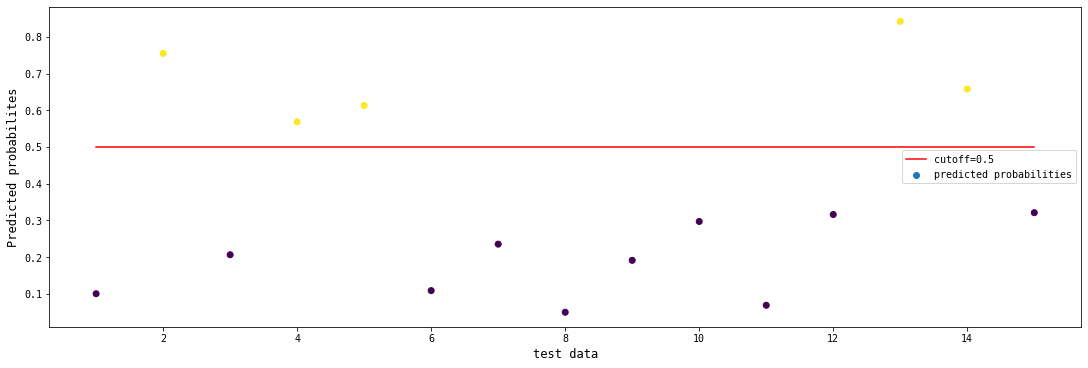

In [112]:
fig = plt.figure(figsize=(15, 5), constrained_layout=True)
x = range(1, len(predict_probas) + 1)
plt.scatter(x, predict_probas, c=predictions, label='predicted probabilities')
plt.plot(x, [cutoff] * len(predictions), color='red', label='cutoff=0.5')

plt.ylabel('Predicted probabilites', fontsize=12)
plt.xlabel('test data', fontsize=12)
plt.legend(loc=7);

In [114]:
SLR()

SLR(learning_rate=0.01, n_epochs=10000, cutoff=0.5)

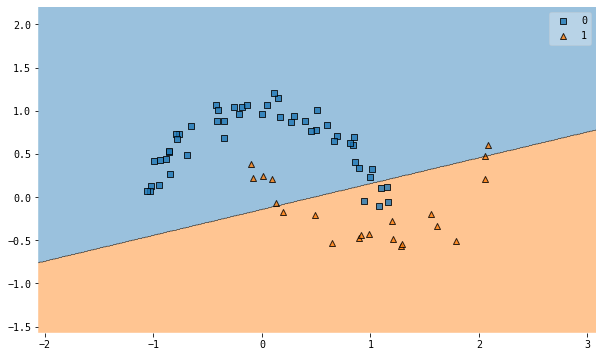

In [116]:
from mlxtend.plotting import plot_decision_regions

fig = plt.figure(figsize=(10, 6))
sgd = SLR()
sgd.fit(X, y)
plot_decision_regions(X, y, sgd)

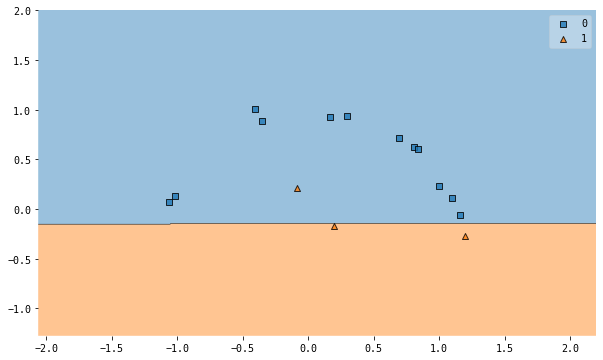

In [118]:

fig = plt.figure(figsize=(10, 6))
sgd = SLR()
sgd.fit(X_test, y_test)
plot_decision_regions(X_test, y_test, sgd)

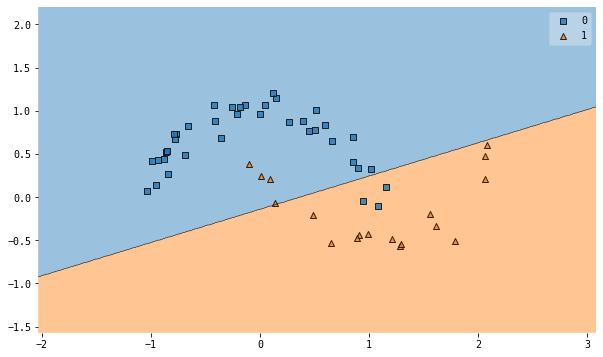

In [119]:

fig = plt.figure(figsize=(10, 6))
sgd = SLR()
sgd.fit(X_train, y_train)
plot_decision_regions(X_train, y_train, sgd)

In [120]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [135]:
degrees = [1, 2, 3, 4, 5,10,11,14,15]

for degree in degrees:
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),
                     ('model', SLR(learning_rate=1e-2, n_epochs=1000, cutoff=0.5))])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_train)
    
    accuracies = {
    'train accuracy': pipeline.score(X_train, y_train),
    'test accuracy': pipeline.score(X_test, y_test)
    }
    
    print(*accuracies.items())


('train accuracy', 0.8571428571428571) ('test accuracy', 0.7333333333333333)
('train accuracy', 0.8571428571428571) ('test accuracy', 0.7333333333333333)
('train accuracy', 0.8571428571428571) ('test accuracy', 0.7333333333333333)
('train accuracy', 0.875) ('test accuracy', 0.8)
('train accuracy', 0.8928571428571429) ('test accuracy', 0.8)
('train accuracy', 0.9107142857142857) ('test accuracy', 0.8666666666666667)
('train accuracy', 0.9107142857142857) ('test accuracy', 0.8666666666666667)
('train accuracy', 0.8214285714285714) ('test accuracy', 0.8)
('train accuracy', 0.7857142857142857) ('test accuracy', 0.6666666666666666)


In [ ]:
pipe4 = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(penalty='l2', C=1e-1, solver='saga'))
])

In [137]:
degrees = [10,11,14,15]

for degree in degrees:
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),
                     ('model',LogisticRegression())])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_train)
    
    accuracies = {
    'train accuracy': pipeline.score(X_train, y_train),
    'test accuracy': pipeline.score(X_test, y_test)
    }
    
    print(*accuracies.items())


('train accuracy', 0.9821428571428571) ('test accuracy', 1.0)
('train accuracy', 0.9821428571428571) ('test accuracy', 0.9333333333333333)
('train accuracy', 0.9821428571428571) ('test accuracy', 0.9333333333333333)
('train accuracy', 0.9821428571428571) ('test accuracy', 0.9333333333333333)


In [143]:
degrees = [1,2,3,4,5,6]

for degree in degrees:
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),
                     ('model',LogisticRegression(penalty='l2', C=1e-1, solver='saga'))])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_train)
    
    accuracies = {
    'train accuracy': pipeline.score(X_train, y_train),
    'test accuracy': pipeline.score(X_test, y_test)
    }
    
    print(*accuracies.items())

('train accuracy', 0.8928571428571429) ('test accuracy', 0.8)
('train accuracy', 0.8392857142857143) ('test accuracy', 0.8)
('train accuracy', 0.875) ('test accuracy', 0.8)
('train accuracy', 0.875) ('test accuracy', 0.8)
('train accuracy', 0.875) ('test accuracy', 0.8)
('train accuracy', 0.8214285714285714) ('test accuracy', 0.7333333333333333)


In [147]:
degrees = [1,4,5,6,7]

for degree in degrees:
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),
                     ('model',LogisticRegression(penalty='l1', C=1e-1, solver='saga'))])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_train)
    
    accuracies = {
    'train accuracy': pipeline.score(X_train, y_train),
    'test accuracy': pipeline.score(X_test, y_test)
    }
    
    print(*accuracies.items())

('train accuracy', 0.6785714285714286) ('test accuracy', 0.8)
('train accuracy', 0.7857142857142857) ('test accuracy', 0.8)
('train accuracy', 0.8214285714285714) ('test accuracy', 0.8)
('train accuracy', 0.8392857142857143) ('test accuracy', 0.8)
('train accuracy', 0.8214285714285714) ('test accuracy', 0.7333333333333333)


In [172]:

def test_poly_model(degree=5):
    poly_model = Pipeline([('poly', PolynomialFeatures(degree=degree)),
                       ('model', SLR(learning_rate=1e-2, n_epochs=1000, cutoff=0.5))])
    poly_model.fit(X_train, y_train)
    poly_y_pred = poly_model.predict(X_test)
    
    
    fig = plt.figure(figsize=(10, 6))
    #sgd = SLR()
    #sgd.fit(X_train, y_train)
    accuracies = {
    'test accuracy': poly_model.score(X_test, y_test)
    }
    
    print(*accuracies.items())
    plot_decision_regions(X_test, y_test, poly_model)

    #plot_decision_regions(X_train, y_train, poly_model)

    #plot_decision_regions(y_test, y_test, sgd)

('test accuracy', 0.8)


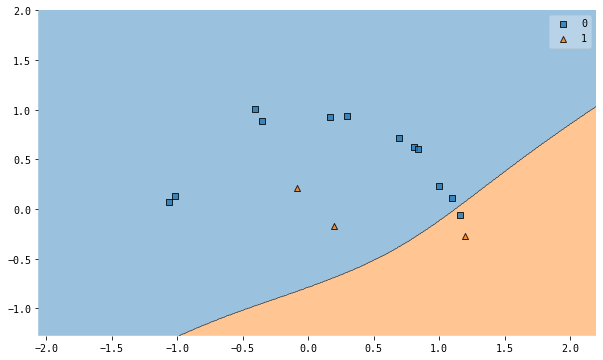

In [173]:
test_poly_model(degree=5)

('test accuracy', 0.8666666666666667)


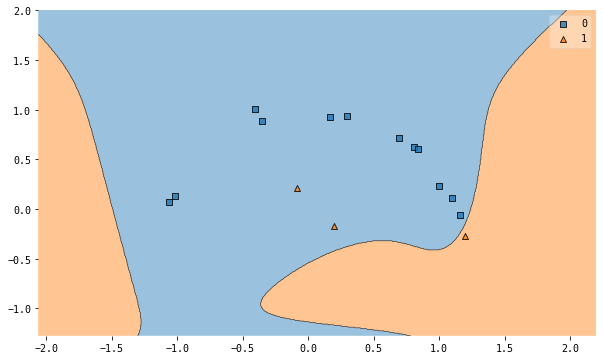

In [174]:
test_poly_model(degree=12)

In [ ]:
test_poly_model(degree=12)

In [175]:
from sklearn.datasets import make_blobs, make_circles

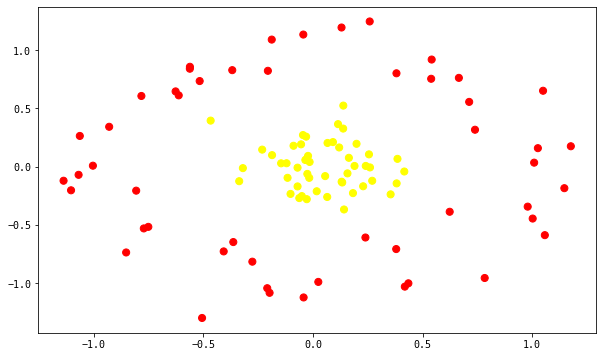

In [180]:
# Пример кода из книги Дж. Вандер Пласа
X, y = make_circles(100, factor=.1, noise=.15)
fig = plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')


In [181]:

from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 2)
(20, 2)
(80,)
(20,)


In [182]:
pipe0 = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', SLR(learning_rate=1e-2, n_epochs=1000, cutoff=0.5))
])

pipe0.fit(X_train, y_train)

accuracies = {
    'train accuracy': pipe0.score(X_train, y_train),
    'test accuracy': pipe0.score(X_test, y_test)
}

print(*accuracies.items())

('train accuracy', 0.6875) ('test accuracy', 0.7)


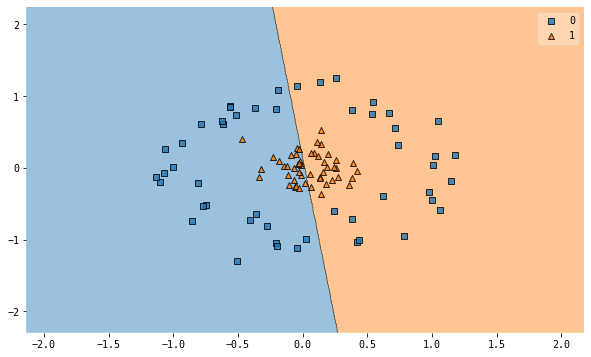

In [183]:

fig = plt.figure(figsize=(10, 6))
sgd = SLR()
sgd.fit(X, y)
plot_decision_regions(X, y, sgd)

In [191]:
degrees = [1, 2, 3, 4, 5,10]

for degree in degrees:
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),
                     ('model', SLR(learning_rate=1e-2, n_epochs=1000, cutoff=0.5))])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_train)
    
    accuracies = {
    'train accuracy': pipeline.score(X_train, y_train),
    'test accuracy': pipeline.score(X_test, y_test)
    }
    
    print(*accuracies.items())

('train accuracy', 0.65) ('test accuracy', 0.7)
('train accuracy', 0.9875) ('test accuracy', 0.95)
('train accuracy', 0.9875) ('test accuracy', 0.95)
('train accuracy', 0.975) ('test accuracy', 0.95)
('train accuracy', 0.975) ('test accuracy', 0.95)
('train accuracy', 0.9375) ('test accuracy', 0.95)


('test accuracy', 0.95)


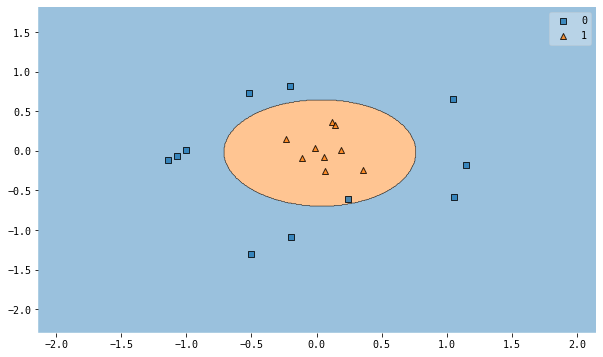

In [185]:
test_poly_model(degree=3)

('test accuracy', 0.7)


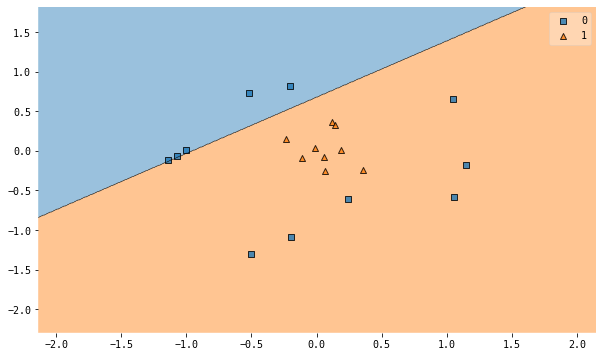

In [186]:
test_poly_model(degree=1)

Text(184.92000000000002, 0.5, 'Actual label')

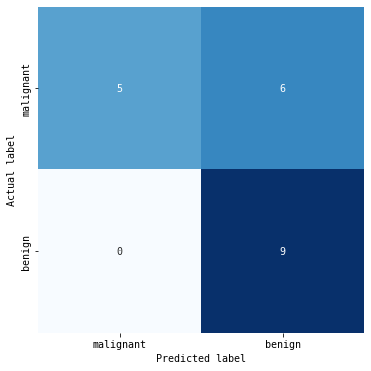

In [190]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_predicted = pipe0.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['malignant', 'benign']

fig = plt.figure(figsize=(10, 6))

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [204]:
predictions=pipe0.predict(X_test)

cm = confusion_matrix(y_test, predictions)

TN, FP, FN, TP = confusion_matrix(y_test, predictions).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  9
False Positive(FP) =  6
True Negative(TN)  =  5
False Negative(FN) =  0


In [205]:
accuracy =  (TP + TN) / (TP + FP + TN + FN)

print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))

Accuracy of the binary classifier = 0.700


In [195]:
pipe1 = Pipeline([('poly_features', PolynomialFeatures(degree=2)),
                     ('model', SLR(learning_rate=1e-2, n_epochs=1000, cutoff=0.5))])

In [198]:
models = {}

# Logistic Regression
from sklearn.linear_model import LogisticRegression
models['Logistic Regression'] = LogisticRegression()

models['Logistic Regression function']=pipe0

models['Logistic Regression polynom']=pipe1

from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy, precision, recall = {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(X_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(X_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)

In [199]:
import pandas as pd

df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()

df_model

,Accuracy,Precision,Recall
Logistic Regression,0.70,1.0,0.6
Logistic Regression function,0.70,1.0,0.6
Logistic Regression polynom,0.95,1.0,0.9


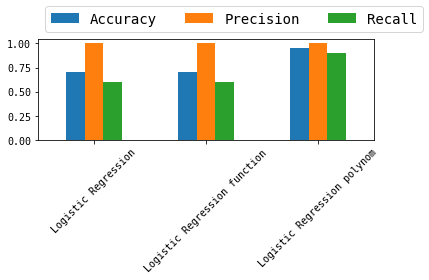

In [200]:
ax  = df_model.plot.bar(rot=45)
ax.legend(ncol= len(models.keys()), bbox_to_anchor=(0, 1), loc='lower left', prop={'size': 14})
plt.tight_layout()